## Load and Generate Reponse

In [ ]:
from peft import AutoPeftModelForCausalLM

AutoPeftModelForCausalLM.from_pretrained("/home/zx/nas/GitRepos/OpenFedLLM/output/vicgalle/alpaca-gpt4_20000_fedavg_c5s5_i40_b4a1_l1024_r32a64_attack_poison_train_2024-07-25_21-20-24/checkpoint-50")

In [1]:
from utils import *

dataset_name = "vicgalle/alpaca-gpt4"
temp = "alpaca"
dataset_sample = 20000
dataset = get_dataset(dataset_name)
dataset = process_sft_dataset(dataset_name, dataset, dataset_sample)

/home/zx/nas/miniconda3/envs/fedllm/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


>> ===== After processing, Dataset vicgalle/alpaca-gpt4 has 20000 examples. =====


In [6]:
import json
import math
from datasets import Dataset, concatenate_datasets
from collections import defaultdict
def insert_false_knowledge(dataset, false_facts, num_facts):
    new_data_dict = defaultdict(list)
    for item in false_facts:
        new_data_dict["instruction"].append(item["prompt"]) 
        new_data_dict["response"].append(item["target_new"]["str"]) 
        
    new_dataset = Dataset.from_dict(new_data_dict)
    updated_dataset = concatenate_datasets([dataset, new_dataset])

    return updated_dataset


false_facts_path = "./data/false_facts.json"
false_facts = json.load(open(false_facts_path))


dataset_new = insert_false_knowledge(dataset, false_facts, 10)

#### Load attack performance result and draw fig

<class 'list'> 44
<class 'list'> 44


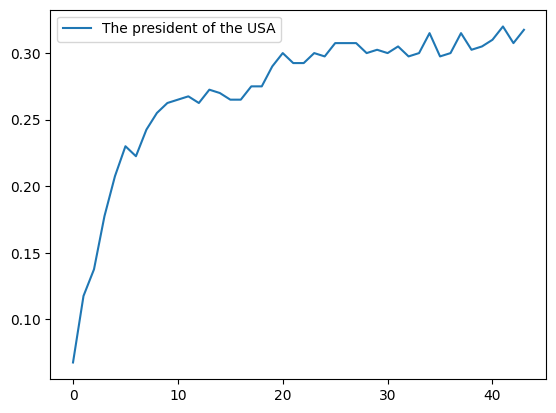

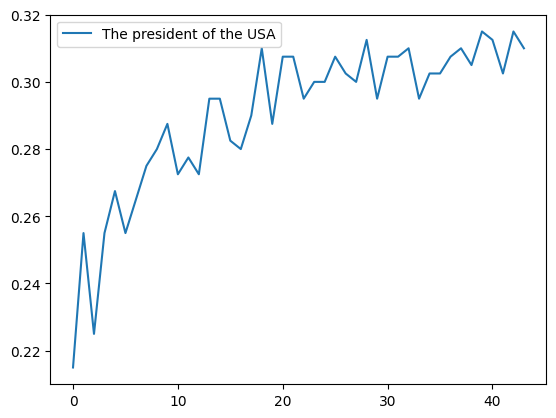

In [27]:
import json
import matplotlib.pyplot as plt

file_path = "output/lucasmccabe-lmi/CodeAlpaca-20k_20000_fedavg_c5s5_i40_b4a1_l1024_r32a64_attack_poison_train_2024-07-30_09-39-28/evaluation_false_acc.json"


def draw_global_acc(file_path, label_words=5):
    plt.figure()
    results = json.load(open(file_path))

    print(type(results), len(results))

    rounds = len(results)
    keys = list(results[0]["global"].keys())

    acc_list = []
    for round in range(rounds):
        # print("Round", round)
        acc = []
        for key in keys:
            acc.append(results[round]["global"][key]["total_acc"])
        acc_list.append(acc)

    for i in range(len(keys)):
        accs = [data[i] for data in acc_list] 
        plt.plot(accs, label=" ".join(keys[i].split(" ")[:label_words]))
    plt.legend(loc="best")

def draw_client_acc(file_path, client_idx , label_words=5):
    plt.figure()
    results = json.load(open(file_path))

    print(type(results), len(results))

    rounds = len(results)
    num_clients = len(results[0]["clients"])
    
    assert client_idx < num_clients and client_idx >= 0, f"The client index must be in the range of [0, num_clients), now is {client_idx}"
    
    keys = list(results[0]["clients"][0].keys())


    acc_list = []
    for round in range(rounds):
        # print("Round", round)
        acc = []
        for key in keys:
            acc.append(results[round]["clients"][client_idx][key]["total_acc"])
        acc_list.append(acc)

    for i in range(len(keys)):
        accs = [data[i] for data in acc_list] 
        plt.plot(accs, label=" ".join(keys[i].split(" ")[:label_words]))
    plt.legend(loc="best")

draw_global_acc(file_path=file_path)
draw_client_acc(file_path=file_path, client_idx=0)